In [1]:
from ssdr import generate_constraints, ssdr
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import torch

In [2]:
data = load_iris()
X = data.data
y = data.target

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [4]:
cons_lst = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
accuracy_ssdrCMU_lst, accuracy_ssdrM_lst, accuracy_ssdrCM_lst, accuracy_pca_lst = [], [], [], []
for constraints_num in cons_lst:
    must_link, cannot_link = generate_constraints(n_samples=len(y_train), constraints_num=constraints_num,
                                                  is_labeled=True, y=y_train)
    W_ssdrCMU = ssdr(torch.tensor(X_train, dtype=torch.float32), must_link, cannot_link, d=2)
    X_train_ssdrCMU = torch.matmul(torch.tensor(X_train, dtype=torch.float32), W_ssdrCMU).numpy()
    X_test_ssdrCMU = torch.matmul(torch.tensor(X_test, dtype=torch.float32), W_ssdrCMU).numpy()

    W_ssdrM = ssdr(torch.tensor(X_train, dtype=torch.float32), must_link, [], d=2, have_unable=False)
    X_train_ssdrM = torch.matmul(torch.tensor(X_train, dtype=torch.float32), W_ssdrM).numpy()
    X_test_ssdrM = torch.matmul(torch.tensor(X_test, dtype=torch.float32), W_ssdrM).numpy()

    W_ssdrCM = ssdr(torch.tensor(X_train, dtype=torch.float32), must_link, cannot_link, d=2, have_unable=False)
    X_train_ssdrCM = torch.matmul(torch.tensor(X_train, dtype=torch.float32), W_ssdrCM).numpy()
    X_test_ssdrCM = torch.matmul(torch.tensor(X_test, dtype=torch.float32), W_ssdrCM).numpy()

    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=1)

    knn.fit(X_train_ssdrCMU, y_train)
    accuracy_ssdrCMU = knn.score(X_test_ssdrCMU, y_test)
    
    knn.fit(X_train_ssdrM, y_train)
    accuracy_ssdrM = knn.score(X_test_ssdrM, y_test)
    
    knn.fit(X_train_ssdrCM, y_train)
    accuracy_ssdrCM = knn.score(X_test_ssdrCM, y_test)

    knn.fit(X_train_pca, y_train)
    accuracy_pca = knn.score(X_test_pca, y_test)

    accuracy_ssdrCMU_lst.append(accuracy_ssdrCMU)
    accuracy_ssdrM_lst.append(accuracy_ssdrM)
    accuracy_ssdrCM_lst.append(accuracy_ssdrCM)
    accuracy_pca_lst.append(accuracy_pca)

Text(0, 0.5, 'Accuracy')

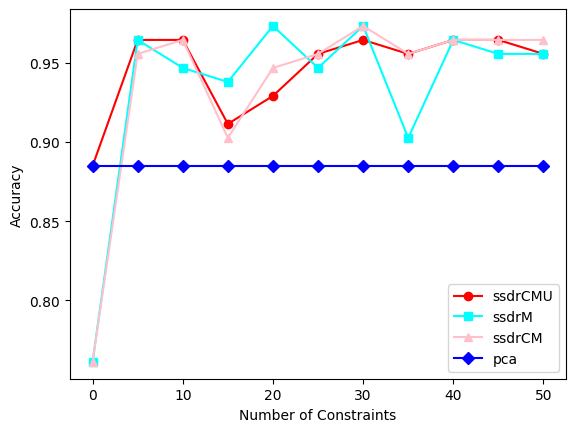

In [5]:
plt.plot(cons_lst, accuracy_ssdrCMU_lst, color='red', marker='o', label='ssdrCMU')
plt.plot(cons_lst, accuracy_ssdrM_lst, color='cyan', marker='s', label='ssdrM')
plt.plot(cons_lst, accuracy_ssdrCM_lst, color='pink', marker='^', label='ssdrCM')
plt.plot(cons_lst, accuracy_pca_lst, color='blue', marker='D', label='pca')
plt.legend()
plt.xlabel('Number of Constraints')
plt.ylabel('Accuracy')

In [6]:
# 重复实验200次
for experiment in range(200):
    accuracy_ssdrCMU_lst, accuracy_ssdrM_lst, accuracy_ssdrCM_lst, accuracy_pca_lst = [], [], [], []
    for constraints_num in cons_lst:
        must_link, cannot_link = generate_constraints(n_samples=len(y_train), constraints_num=constraints_num,
                                                      is_labeled=True, y=y_train)
        W_ssdrCMU = ssdr(torch.tensor(X_train, dtype=torch.float32), must_link, cannot_link, d=2)
        X_train_ssdrCMU = torch.matmul(torch.tensor(X_train, dtype=torch.float32), W_ssdrCMU).numpy()
        X_test_ssdrCMU = torch.matmul(torch.tensor(X_test, dtype=torch.float32), W_ssdrCMU).numpy()

        W_ssdrM = ssdr(torch.tensor(X_train, dtype=torch.float32), must_link, [], d=2, have_unable=False)
        X_train_ssdrM = torch.matmul(torch.tensor(X_train, dtype=torch.float32), W_ssdrM).numpy()
        X_test_ssdrM = torch.matmul(torch.tensor(X_test, dtype=torch.float32), W_ssdrM).numpy()

        W_ssdrCM = ssdr(torch.tensor(X_train, dtype=torch.float32), must_link, cannot_link, d=2, have_unable=False)
        X_train_ssdrCM = torch.matmul(torch.tensor(X_train, dtype=torch.float32), W_ssdrCM).numpy()
        X_test_ssdrCM = torch.matmul(torch.tensor(X_test, dtype=torch.float32), W_ssdrCM).numpy()

        pca = PCA(n_components=2)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=1)

        knn.fit(X_train_ssdrCMU, y_train)
        accuracy_ssdrCMU = knn.score(X_test_ssdrCMU, y_test)
        accuracy_ssdrM = knn.score(X_test_ssdrM, y_test)
        accuracy_ssdrCM = knn.score(X_test_ssdrCM, y_test)

        knn.fit(X_train_pca, y_train)
        accuracy_pca = knn.score(X_test_pca, y_test)

        accuracy_ssdrCMU_lst.append(accuracy_ssdrCMU)
        accuracy_ssdrM_lst.append(accuracy_ssdrM)
        accuracy_ssdrCM_lst.append(accuracy_ssdrCM)
        accuracy_pca_lst.append(accuracy_pca)

    plt.plot(cons_lst, accuracy_ssdrCMU_lst, color='red', marker='o', label='ssdrCMU')
    plt.plot(cons_lst, accuracy_ssdrM_lst, color='cyan', marker='s', label='ssdrM')
    plt.plot(cons_lst, accuracy_ssdrCM_lst, color='pink', marker='^', label='ssdrCM')
    plt.plot(cons_lst, accuracy_pca_lst, color='blue', marker='D', label='pca')
    plt.legend()
    plt.xlabel('Number of Constraints')
    plt.ylabel('Accuracy')
    plt.title(f'Experiment {experiment + 1}')
    plt.savefig(f'exp_pic/accuracy_plot_{experiment + 1}.png')
    plt.clf()

<Figure size 640x480 with 0 Axes>